In [1]:
# Bring in our libraries, set some variables for the whole notebook
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Hypothesis Testing

<a id='frequentist-hypothesis-testing'></a>

### Frequentist Hypothesis Testing: A Drug Efficacy Example

---

Frequentist methods lend themselves well to the concepts of experimental design. For example, say we are testing the efficacy of a new drug:

- We randomly select 50 people to be in the placebo control condition and 50 people to recieve the treatment.
- We know our sample is selected from a broader, unknown population pool.
- We can imagine that, in a hypothetical parallel world, we could have ended up with a different random sample of subjects from the population pool.


<a id='null-hypothesis'></a>

### The "Null" Hypothesis

---

The **null hypothesis** is a fundamental concept of Frequentist statistical tests. We typically denote the null hypothesis with **H0**. 

In our drug efficacy experiment example, our null hypothesis could be that there is no difference between a subject taking a placebo and and one taking the treatment drug.

In the context of experiments, we often talk about the "control" group and the "experimental" or "treatment" group. In our example, the control group is the one given the placebo and the treatment group is the one given the actual drug. We are interested in the average difference in blood pressure levels between the treatment and control groups.

> **H0:** The mean difference between treatment and control groups is zero.

<a id='alternative-hypothesis'></a>

### The "Alternative Hypothesis"

---

The **alternative hypothesis** is the outcome of the experiment that we hope to show. In our example, the alternative hypothesis is that there is in fact a mean difference in blood pressure between the treatment and control groups. 

> **H1:** The parameter of interest — our mean difference between treatment and control — is different than zero.

**NOTE:** The null and alternative hypotheses are concerned with the true values, or, in other words, the *parameter of the overall population*. Through the process of experimentation/hypothesis testing and statistical analysis of the results, we will make an *inference* about this population parameter.

<a id='t-tests'></a>

### Introduction to the T-Test

---

Say that, in our experiment, we measure the following results:

- The 50 subjects in the control group have an average systolic blood pressure of 121.38.
- The 50 subjects in the experimental/treatment group have an average systolic blood pressure of 111.56.

The difference between experimental and control groups is -9.82 points. But, with 50 subjects in each group, how confident can we be that this measured difference is real? We can perform what is known as a **t-test** to evaluate this.

First, we will calculate a **t-statistic**. The t-statistic is a measure of the degree to which our groups differ, standardized by the variance of our measurements.

Secondly, we will calculate a **p-value**. The p-value is a metric that indicates a probability that our measured difference was because of random chance in the sampling of subjects.

Five steps to hypothesis testing:
1. Construct a null hypothesis that you want to contradict and its complement, the alternative hypothesis.
2. Specify a level of significance.
3. Calculate your point estimate(s).
4. Calculate your test statistic.
5. Find your $p$-value and make a conclusion.

**We can set up the experimental and control observations below as `numpy` arrays.**

In [2]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])

print(np.mean(control))
print(np.mean(experimental))
print(np.mean(experimental) - np.mean(control))

121.38
111.56
-9.819999999999993


<a id='likelihood-data'></a>

### Step 1: Construct the null and alternative hypotheses

---

For our experiment, we will set up a null hypothesis and an alternative hypothesis:

> **H0:** The difference in systolic blood pressure between the experimental and control groups is 0.

> **H1:** The difference in systolic blood pressure between the experimental and control groups is not 0.

Likewise, our measured difference is **-9.82**.

Recall that, as Frequentists, we want to know:

### $$P(\text{data}\;|\;H_0)$$

**What is the probability that we observed this data, GIVEN a specified mean difference in blood pressure.**


### Step 2: Specify a level of significance

If $P(\text{data}\;|\;H_0)$ is "small" then our data probably does not support our null hypothesis.  But how "small" is small enough?

This is set by our level of significance, which we call $\alpha$.

Typically (and somewhat arbitrarily) the value $\alpha=0.05$ is used.  This means that there is a 5% chance that we will _incorrectly reject the null hypothesis_ (aka Type 1 error or false positive).  Put another way, there is a 5% chance that we will claim a significant difference in blood pressure between the two groups when in fact there is no (statistically significant) difference.

<a id='t-statistic'></a>

### Step 4: Calculating the T-Statistic

---

When comparing two means, the **t-statistic** is a classic metric for quantifying the difference between groups. In essence, our t-statistic will be a standardized version of the difference between groups where the standardization is adjusting for the variance in measurements.

When comparing the difference between groups, we can calculate the two-sample t-statistic like so:

### $$t = \frac{\bar{x}_E - \bar{x}_C}{\sqrt {s^2 (\frac{1}{n_E} + \frac{1}{n_C})}}$$

In our example, $\bar{x}_E$ is the mean of our experimental group's sample measurements and $\bar{x}_C$ is the mean of our control group's sample measurements.

$n_E$ and $n_C$ are the number of observations in each group. 

The $s^2$ denotes our *sample variance*. In this version of the t-test, we are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the t-test where equal variance is not assumed, but, in our case, it is a reasonable assumption.

The sample variance is calculated like so:

### $$ s^2 = \frac{\sum_{i=1}^{n_E} (x_i - \bar{x}_E)^2 + \sum_{j=1}^{n_C} (x_j - \bar{x}_C)^2}{ n_E + n_C -2} $$

This combines the variance of the two groups' measurements into a single pooled metric. 


**Let's do this calculation using `scipy.stats.ttest_ind`.**

> To try your skills at `numpy` and `python`, try doing this calculation by implementing the above equations on your own!

In [5]:
import scipy.stats as stats

In [3]:
result = stats.ttest_ind(experimental, control)
result.statistic, result.pvalue

(-1.8915462966190273, 0.061504240672530394)

In [ ]:
stats.ttest_ind_

In [4]:
t_stat, p_value = stats.ttest_ind(experimental, control)

<a id='visualizing-t-statistic'></a>

### Visualizing the T-Statistic

---

From the central limit theorem, we know that (with asymptotically infinite samples), the distribution of sample means drawn from a population is normal. In the case of smaller sample sizes, [we adjust this to be a more conservative student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

We can plot the student's t-distribution below. It is centered on 0, where a value of 0 corresponds to our null hypothesis. We can also plot a vertical line with our measured t-statistic.

In [8]:
# Generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

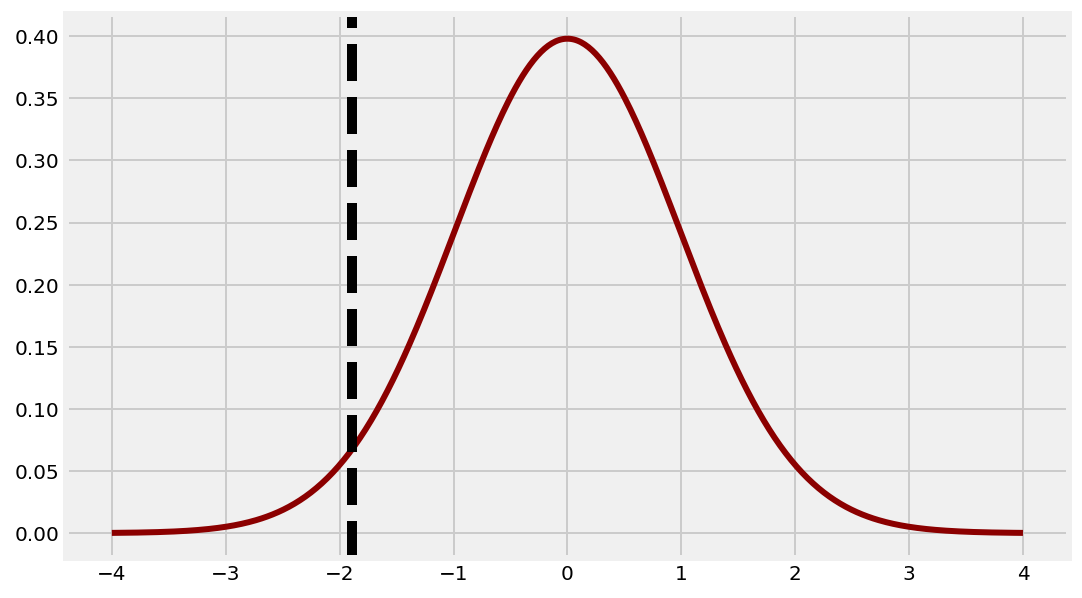

In [9]:
# Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure.
ax = fig.gca()

# Plot the lines using `matplotlib`'s plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# Plot a vertical line for our measured difference in rates' t-statistic.
ax.axvline(t_stat, color='black', linestyle='--', lw=5)

<a id='p-value'></a>

### Step 5: The P-Value

---

With the t-statistic, we are able to calculate the *statistical significance* of the test with a **p-value**. Statistical significance indicates our degree of confidence to infer a parameter about an overall population based on a statistic calculated from our sample.

Because of the unintuitive framing of Frequentist statistics, the p-value is often communicated and perceived incorrectly. It is important to remember that the p-value does **NOT** relate to _probability of the parameter_. In Frequentist statistics, the parameter, such as the mean difference, is **fixed**. Probability is instead associated with the *data*.

> **The p-value is the probability that, given that the null hypothesis `H0` is true, we could have ended up with a statistic at least as extreme as the one measured from our random sample of data from the true population.**

We have measured a difference in blood pressure of -9.82 between the experimental and control groups. We then calculated a t-statistic associated with this difference of -1.89. In our specific example:

> The p-value is the probability that, given there is a 0.0 true difference in blood pressure between experimental and control conditions (i.e., no effect of the drug), we were able to calculate a t-statistic at least as extreme as -1.89 from a random sample of data from the true population.

<a id='visualize-p-value'></a>

### Visualizing the P-Value

---

Our null hypothesis states that there is no difference between the groups, so the t-statistic would be 0. 

Recall that our alternative hypothesis is that the difference between groups is *not* 0. This could mean that the difference is greater *or* less than 0 — we haven't specified either. This is known as a **two-tailed t-test**, which is what we are currently conducting. The test is "two tailed" because, when we say "at least as extreme as ...," we are thinking about the *magnitude* of our t-statistic.

**We can plot the t-distribution again using our t-statistic of -1.89 as well as a t-statistic of 1.89 on the other side of the distribution.**

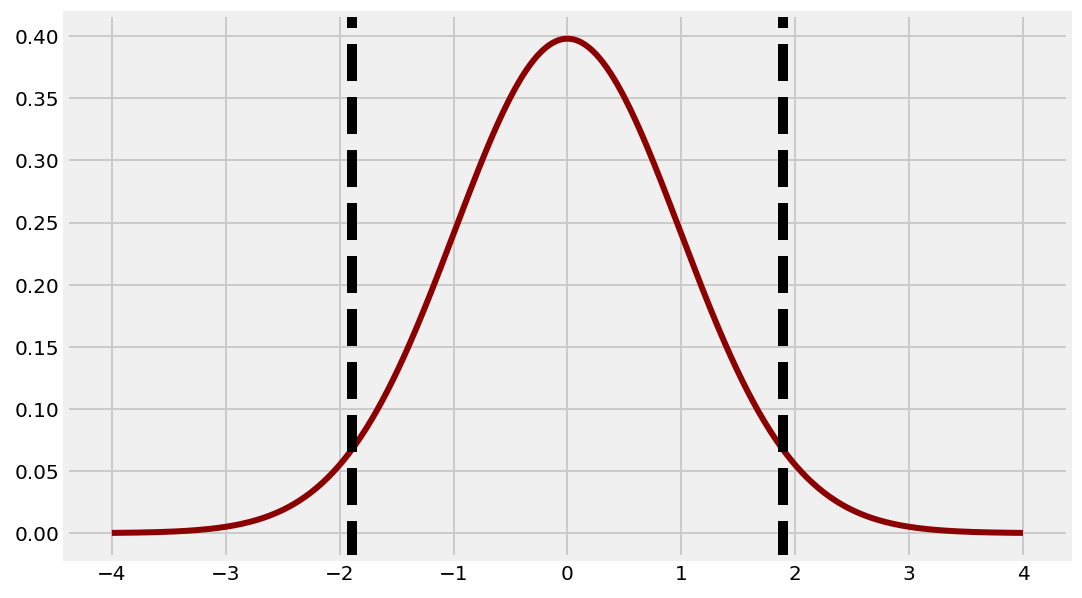

In [31]:
# Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

**Our p-value corresponds to the area under the curve of the distribution where the magnitude of the t-statistic is greater than or equal to the one we measured (shown with the dotted lines)**.

`stats.t.cdf()` is the cumulative distribution function and will calculate the area under the curve, up to a specified t-statistic. 

**Calculate the area under the tails of the t-distribution that falls beyond the dotted lines using the `.cdf()` function. This will verify that it's the same as the p-value calculated by `scipy`.**

In [5]:
n_exp = len(experimental)
n_con = len(control)

lower_tail = stats.t.cdf(-abs(t_stat), n_exp+n_con-2)
upper_tail = 1. - stats.t.cdf(abs(t_stat), n_exp+n_con-2)
p_value_man = lower_tail

print(p_value)
print(p_value_man)

0.061504240672530394
0.030752120336265197


### So what's the conclusion?

Remember that $\alpha$ is our level significance.  Let's call the p-value $p$.

- If $p < \alpha$, then there is evidence to reject the null hypothesis, i.e., something's going on, i.e., a statisically significant difference!
- If $p > \alpha$, then there is insufficient evidence to reject the null hypothesis, i.e., business as usual, i.e., there is no statistical difference between your your two groups.

<a id='additional-resources'></a>

### Additional Resources

---

- [A high-level overview of the t-test procedure](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics).
- [Another overview of the t-test procedure](http://www.statsdirect.com/help/parametric_methods/utt.htm).


## Extra Practice

### Check: Pair Problem Solving, 10 minutes

---

Let's say I am buying bitcoin-mining hardward for a friend.  The performance of these machines is measured in a unit called MHash/J.  I have my options narrowed down to two units:

1. JetBlazer 2000: average performance of 1450 MHash/J with a standard deviation of 300 (based on 25 trials.)
2. MakeUMoney 2460: average performance of 1367 MHash/J with a standard deviation of 100 (baesd on 25 trials.)

**Question**: The JetBlazer is _a lot_ more money.  Do you think it is worth it?

**Hint**: I am not giving you all of the data in this case, so you use the function `scipy.stats.ttest_ind_from_stats` instead.

In [ ]:
# Null hypothesis is that the machines have the same performance.
mean_a = 1450
mean_b = 1367
s_a = 300
s_b = 100
t_stat, pvalue = stats.ttest_ind_from_stats(mean_a, s_a, 25, mean_b, s_b, 25)

## Bonus: The One-Sample T-Test

---

## Single-sample t-test

---

So far we have seen t-tests with *two independent samples*.  What if we only have one sample?

**Hypothesis**:  The MakeUMoney 2460's performance ($\bar{x}$) is greater than the (arbitrary) industry standard of 1000 MHash/J ($IS$).

**H0**: $\bar{x} \leq IS$$

**HA**: $\bar{x} > IS$$

For this *one-sample t-test*, the t-statistic is

### $$t = \frac{\bar{x} - IS}{s/\sqrt{n}}$$

How to solve... hmmm... well the only thing that has changed is the test statistic!  This hypothesis is still based on the t-distribution, meaning that we assume that the t-distribution describes the sampling distribution, which is the source of randomness.  Note that the t-distribution in this case, however, will have $n-1$ degrees of freedom (recall that it was $n_1 + n_2 - 2$ for the two-sample test.)

You can solve this problem the "manual" way for extra practice by creating a t-distribution from `scipy.stats`.  There is not built-in function for doing the single-sample t-test _from a statistic_.  If you had the full data set (all the performance numbers from the MakeUMoney 2460), then you could use [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).

In [6]:
x_bar = 1367
std = 100
n = 25

IS = 1000

t_statistic = (x_bar - IS)/(std/np.sqrt(n))
print('t-statistic = ', t_statistic)


p_value = 1 - stats.t.cdf(19, df=n-1)
print('p_value = ', p_value)

t-statistic =  18.35
p_value =  2.220446049250313e-16
